<a href="https://colab.research.google.com/github/Kevin-Alvares/Portfolio/blob/main/Data%20Exploration%20and%20Visualisation/Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
The problem at hand is to analyse an OTP streaming service platforms dataset to generate valuable insights that can assist the company in making strategic decisions to produce content that resonates well with their audience and drives business growth in different countries. Specifically, we need to identify trends, preferences, and patterns in the data.


In [ ]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/DEV.csv" -O dev.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("dev.csv")

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#Shape of the dataset

data.shape

(8807, 12)

In [ ]:
#datatype of the columns

data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#further investigating the entries

row1 = data.loc[data['rating']== '74 min']
row1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
row2 = data.loc[data['rating']== '84 min']
row2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [ ]:
row3 = data.loc[data['rating']== '66 min']
row3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#transferring misplaced values from ratings to duration and making ratings Nan

nan_values = data['duration'].isnull()
data.loc[nan_values, 'duration'] = data.loc[nan_values, 'rating']
data.loc[nan_values, 'rating'] = pd.NA

In [ ]:
#checking to see if the values have been transferred successfully

data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
data[data['show_id']=='s5542']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,<NA>,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
#finding the earliest and latest release year for content

print(data["release_year"].nunique())
print(data["release_year"].min())
print(data["release_year"].max())

74
1925
2021


In [ ]:
# Replacing null values in director with "Unknown director"

data["director"].fillna("Unknown Director",inplace=True)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replacing null values in cast with "Unknown Actor"

data["cast"].fillna("Unknown Actor",inplace=True)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replacing null values in country with "Unknown Country"

data["country"].fillna("Unknown Country",inplace=True)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replacing null values in rating with "Unknown rating"

data["rating"] = data["rating"].fillna("Unknown Rating")

In [ ]:
#checking for null values in ratings column

data["rating"].isna().sum()

0

In [ ]:
#type casting date_added column

data['date_added'] = data['date_added'].str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y')
data['date_added'] = data['date_added'].dt.strftime('%d-%m-%Y')
data["date_added"]= pd.to_datetime(data["date_added"])
data["date_added"]

<ipython-input-19-24aff21fed35>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["date_added"]= pd.to_datetime(data["date_added"])


0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-01-07
8804   2019-01-11
8805   2020-11-01
8806   2019-02-03
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [ ]:
#check to see if data has been type casted successfully

print(data["date_added"][0].year)
print(data["date_added"][0].month)

2021
9


In [ ]:
#checking for null values in date_added column

data["date_added"].isnull().sum()

10

In [ ]:
#replacing null data_added values with mode values

data["date_added"] = data["date_added"].fillna(data["date_added"].mode()[0])

In [ ]:
#checking for null values in the date_added column

data["date_added"].isna().sum()

0

In [ ]:
#checking for null values in the dataset

data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# to check if a column has comma separated values

has_comma_separated_values = data['country'].str.contains(',')
print(has_comma_separated_values.any())

True


In [ ]:
#unnesting country column

data["country"]=data["country"].str.split(",")
data = data.explode("country",ignore_index=True)
data['country'] = data['country'].str.strip()

In [ ]:
#unnesting cast column

data["cast"]=data["cast"].str.split(",")
data = data.explode("cast",ignore_index=True)
data['cast'] = data['cast'].str.strip()

In [ ]:
#unnesting listed_in column

data["listed_in"] = data["listed_in"].str.split(",")
data = data.explode("listed_in",ignore_index=True)
data['listed_in'] = data['listed_in'].str.strip()

In [ ]:
# to check if a column has comma separated values

has_comma_separated_values = data['director'].str.contains(',')
print(has_comma_separated_values.any())

True


In [ ]:
#unnesting director column

data["director"]=data["director"].str.split(",")
data = data.explode("director",ignore_index=True)
data['director'] = data['director'].str.strip()

In [ ]:
data['rating'].value_counts()

TV-MA             73915
TV-14             43957
R                 25860
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown Rating       70
Name: rating, dtype: int64

In [ ]:
data['cast'].nunique()

36440

In [ ]:
data['director'].nunique()

4994

In [ ]:
data['listed_in'].value_counts()

Dramas                          29806
International Movies            28243
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [ ]:
data['listed_in'].nunique()

42

In [ ]:
data['title'].nunique()

8807

In [ ]:
data['type'].value_counts()

Movie      145917
TV Show     56148
Name: type, dtype: int64

In [ ]:
#Oldest and earliest relese for tv shows

df = data[data["type"]=="TV Show"]
print(df['release_year'].min())
print(df['release_year'].max())

1925
2021


In [ ]:
#Oldest and earliest relese for movies

df = data[data["type"]=="Movie"]
print(df['release_year'].min())
print(df['release_year'].max())

1942
2021


In [ ]:
df_m_vs_t

,type,title
0,Movie,6131
1,TV Show,2676


# Initial Data Exploration

1.	Shape of the dataset = 8807, 12
There are no duplicate entries. All 8807 entries are unique.

3.	Dataset contains movies and TV shows released from 1925 to 2021. Further analysis will reveal what is the oldest and newest movie added as well as oldest and newest TV show.


  TV shows:
* 2008-04-02 – oldest
* 2021-12-08 – latest

Movies:
* 2008-01-01 – oldest
* 2021-12-08 – latest

4.	Total number of movies: 6131
Total number of TV shows: 2676

5.	Null values were found in the following columns:
* director : 2634
* cast : 825
* country : 831
* date_added : 10
* rating : 4
* duration : 3

6.	We also find multiple nested comma separated values in the column country, listed_in and cast , that need to be unnested


#**Univariate Analysis**

Text(0, 0.5, 'count')

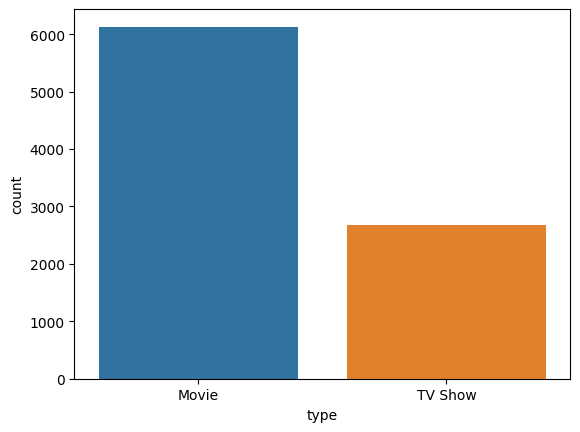

In [ ]:
# number of movies vs tv shows

m_vs_t = data.groupby("type")["title"].nunique()
df_m_vs_t = pd.DataFrame(m_vs_t).reset_index()
sns.barplot(data=df_m_vs_t,x='type',y='title')
plt.ylabel("count")

**Insights:**
* The fact that the platform has more movies(6131) than TV shows(2676) indicates that the audience's preference leans towards movies.
* This includes movies and TV shows released all the way from 1925 to 2021. This shows that the platform has a diverse library that includes both classic and contemporary content.   
* Analysing the distribution of content releases over time can reveal trends in production and consumption. The platform could identify periods when certain types of content are more popular or when certain genres are in demand. This insight could influence the platform's content release strategy.
* It might be interesting to investigate further on popularity of genres and type of content over the past few years.


          country  title
0   United States   3690
1           India   1046
2  United Kingdom    806
3          Canada    445
4          France    393
5           Japan    318
6           Spain    232
7     South Korea    231
8         Germany    226
9          Mexico    169


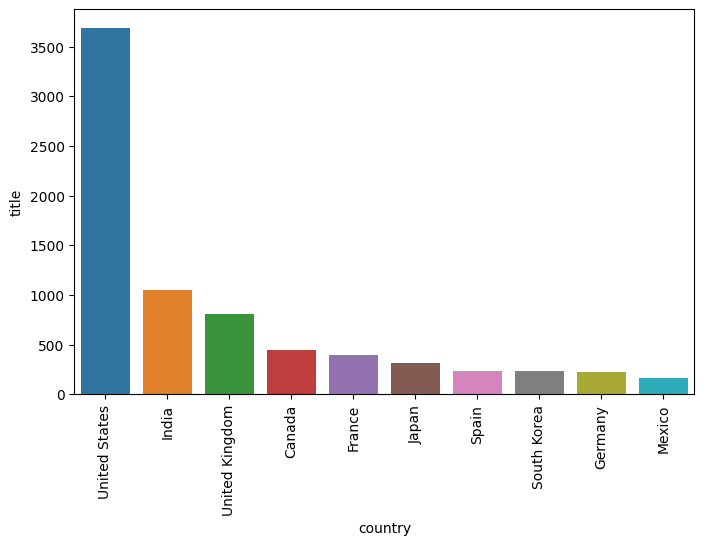

In [ ]:
# countries with the most amount of content produced.

content= data.groupby('country')['title'].nunique()
content_df = pd.DataFrame(content).reset_index()
content_df = content_df.drop(0)
content_df = content_df.drop(117) #dropping unknown country values
content_df_sorted = content_df.sort_values(by='title',ascending=False).reset_index(drop=True)
top_countries = content_df_sorted.head(10)
print(top_countries)
plt.figure(figsize=(8,5))
sns.barplot(data=top_countries,x='country',y='title')
plt.xticks(rotation = 90)

plt.show()



**Insights:**
* The inclusion of content from various countries reflects the platform's ability to offer a culturally diverse range of entertainment.
* For countries like India, South Korea, Mexico, high content production might indicate a growing local entertainment industry. This can present business opportunities for the platform to tap into emerging markets and collaborate with local content creators.


In [ ]:
#countries and their content

content_type = data.groupby(['country', 'type'])['title'].nunique().reset_index()
content_type

,country,type,title
0,,Movie,6
1,,TV Show,1
2,Afghanistan,Movie,1
3,Albania,Movie,1
4,Algeria,Movie,3
...,...,...,...
181,Venezuela,Movie,4
182,Vietnam,Movie,7
183,West Germany,Movie,3
184,West Germany,TV Show,2


In [ ]:
#Pivoting the table in order to get the total amount of content created by each country

pivot_table = content_type.pivot(index='country', columns='type', values='title')

pivot_table = pivot_table.fillna(0)
pivot_table["Total"]=pivot_table["Movie"]+pivot_table["TV Show"]
pivot_table = pivot_table.astype('int64')
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table.drop(0)
pivot_table = pivot_table.drop(117) #dropping unknown country values
pivot_table = pivot_table.sort_values(by=['Total'],ascending=False)

pivot_table.head(10)




type,country,Movie,TV Show,Total
116,United States,2752,938,3690
46,India,962,84,1046
115,United Kingdom,534,272,806
21,Canada,319,126,445
37,France,303,90,393
54,Japan,119,199,318
103,Spain,171,61,232
101,South Korea,61,170,231
39,Germany,182,44,226
68,Mexico,111,58,169


In [ ]:
#melting the table in order to make a double bar plot

df_melted = pivot_table.melt(id_vars=['country','Total'], value_vars=['Movie', 'TV Show'], var_name='Content', value_name='Count')
df_melted = df_melted.sort_values(by=['Total'],ascending=False)
df_melted = df_melted.head(20)
df_melted



,country,Total,Content,Count
0,United States,3690,Movie,2752
122,United States,3690,TV Show,938
123,India,1046,TV Show,84
1,India,1046,Movie,962
124,United Kingdom,806,TV Show,272
2,United Kingdom,806,Movie,534
125,Canada,445,TV Show,126
3,Canada,445,Movie,319
126,France,393,TV Show,90
4,France,393,Movie,303


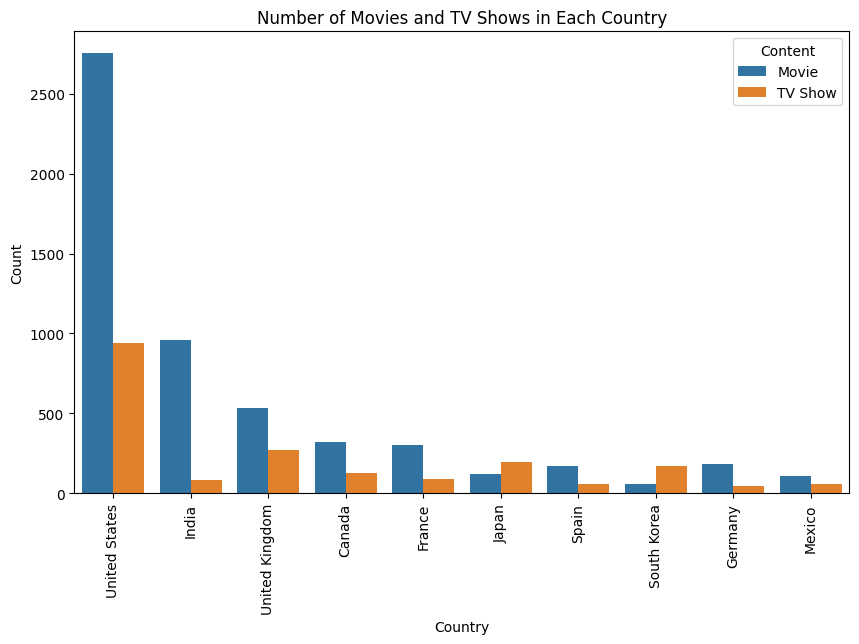

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='Count', hue='Content', data=df_melted)
plt.title('Number of Movies and TV Shows in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

**Insights:**
* Countries like United States, India, United Kingdom, Canada, France, Spain, Germany, Mexico show a much larger production of movies than TV series indicating a preference for movies in these countries.
* Whereas countries like Japan and South Korea have more preferences for TV shows.
* United States and India have a much larger production of movies than TV shows showing a much bigger preference in Movies in these 2 countries and should focus more on movie production.


In [ ]:
#Number of movies produced in a country
#top 10 countries

df = data[data["type"]=="Movie"]


cont_1 = df.groupby("country")["title"].nunique().reset_index()
cont_1 = cont_1.drop(index = 0)
cont_1 = cont_1.drop(index = 112)  #unknown country
sorted_movies = cont_1.sort_values(by=["title"],ascending=False)
movies = sorted_movies.head(10)
movies

,country,title
111,United States,2752
42,India,962
110,United Kingdom,534
19,Canada,319
33,France,303
35,Germany,182
98,Spain,171
50,Japan,119
22,China,114
64,Mexico,111


In [ ]:
#Number of TV shows produced in a country
#top 10 countries

df = data[data["type"]=="TV Show"]


cont_1 = df.groupby("country")["title"].nunique().reset_index()
cont_1 = cont_1.drop(index = 0)
cont_1 = cont_1.drop(index = 64) #unknown country
sorted_tv = cont_1.sort_values(by=["title"],ascending=False)
tv_shows = sorted_tv.head(10)
tv_shows


,country,title
63,United States,938
62,United Kingdom,272
30,Japan,199
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,66
53,Spain,61


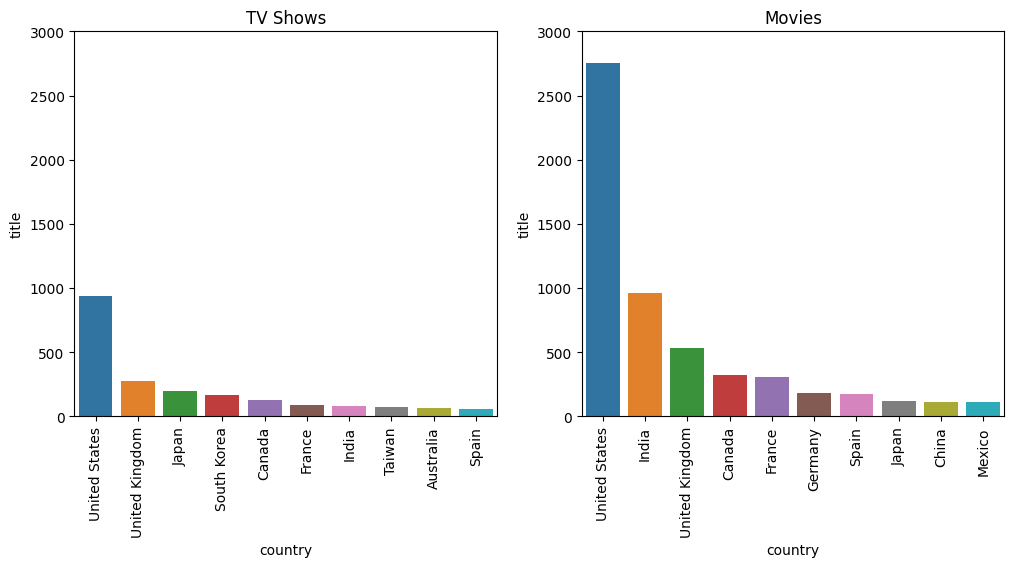

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=tv_shows,x="country",y="title")
plt.title("TV Shows")
plt.xticks(rotation = 90)
plt.ylim(0,3000)

plt.subplot(1,2,2)
sns.barplot(data=movies,x="country",y="title")
plt.title("Movies")
plt.xticks(rotation = 90)
plt.ylim(0,3000)

plt.show()




**Insight:**
* From the above graph, it is clear that The United States produces the most amount of TV shows and movies. Far more than any other country.
* Countries like Japan, South Korea, Taiwan and Australia seem to prefer Tv shows more than Movies.


In [ ]:
#best week to release the TV show

df = data[data["type"]=="TV Show"]
df["week"] = df["date_added"].dt.week
weeks = df.groupby("week")["title"].nunique().reset_index()
weeks

<ipython-input-50-17032a20d8ca>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["date_added"].dt.week
<ipython-input-50-17032a20d8ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df["date_added"].dt.week


,week,title
0,1,295
1,2,205
2,3,33
3,4,32
4,5,39
5,6,50
6,7,51
7,8,38
8,9,21
9,10,34


Text(0, 0.5, 'Count')

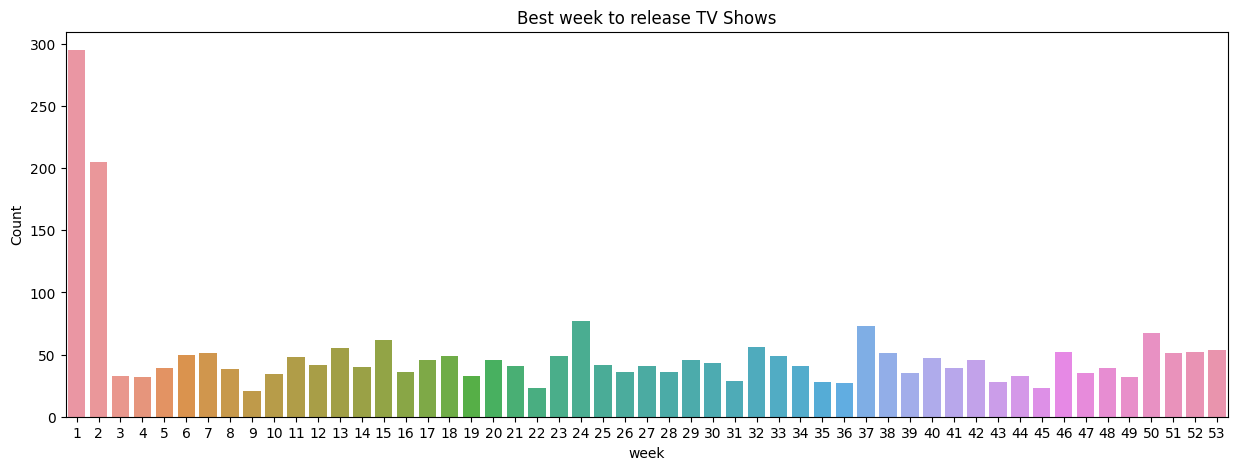

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data = weeks,x="week",y="title")
plt.title('Best week to release TV Shows')
plt.ylabel('Count')

In [ ]:
#best week to release movies

df = data[data["type"]=="Movie"]
df["week"] = df["date_added"].dt.week
weeks = df.groupby("week")["title"].nunique().reset_index()
weeks

<ipython-input-52-cd1de7096efb>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["date_added"].dt.week
<ipython-input-52-cd1de7096efb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df["date_added"].dt.week


,week,title
0,1,1002
1,2,731
2,3,83
3,4,56
4,5,137
5,6,117
6,7,126
7,8,72
8,9,69
9,10,58


Text(0, 0.5, 'Count')

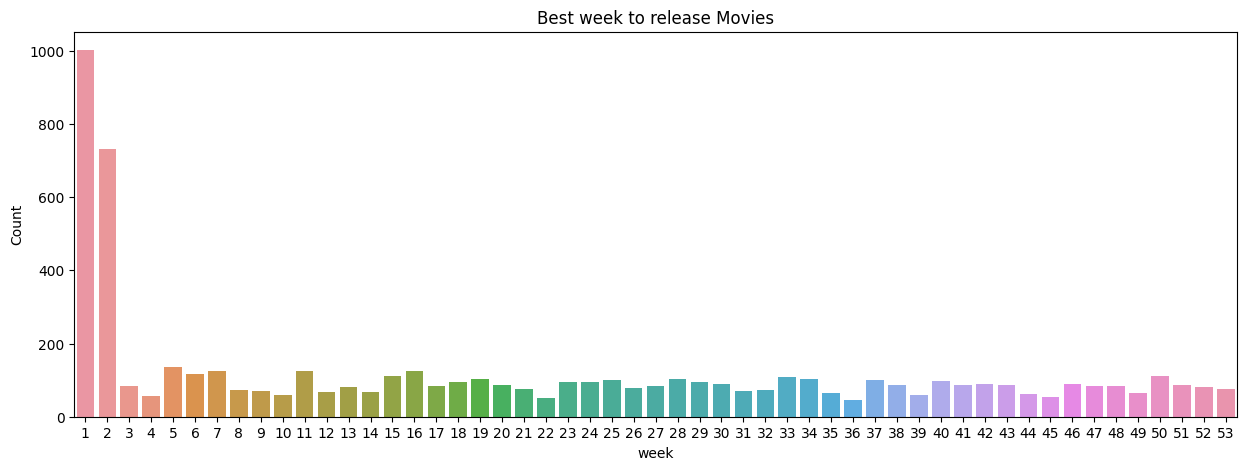

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data = weeks,x="week",y="title")
plt.title('Best week to release Movies')
plt.ylabel('Count')

**Insights:**
* The above 2 graphs show that most content is released during the first 2 weeks of the year.
* The fluctuations in the number of content releases across weeks suggest that there might be seasonal patterns in content production. Certain weeks might correspond to periods of higher content release possibly aligning with holidays, festivals, or other significant events.
* Weeks with higher content releases might also correspond to higher user engagement and activity on the platform. Identifying peak weeks with high content release can indicate the platform's content strategy.
* Weeks with lower content releases could be opportunities to promote existing content or introduce themed events to keep user engagement consistent.


In [ ]:
#top 10 directors who have appeared in the most number of movies

df = data[data["type"]=="Movie"]
directors = df.groupby("director")["title"].nunique().reset_index()
directors = directors.drop(index=4539)
directors = directors.sort_values(by=['title'],ascending=False)
top_movie_directors = directors.head(10)

top_movie_directors

,director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
1859,Jay Chapman,12
2815,Martin Scorsese,12
4726,Youssef Chahine,12


In [ ]:
#top 10 directors who have appeared in the most number of TV shows

df = data[data["type"]=="TV Show"]
directors = df.groupby("director")["title"].nunique().reset_index()
directors = directors.drop(index=284)
directors = directors.sort_values(by=['title'],ascending=False)
top_tv_directors = directors.head(10)

top_tv_directors

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
103,Iginio Straffi,2
251,Shin Won-ho,2



**Insights:**
* Directors in the top 10 list might be known for producing high-quality content. Their involvement could contribute to positive viewer ratings, reviews, and engagement.
* Collaborating with top directors could result in exclusive content creation, co-productions, or partnerships. Their involvement can enhance the platform's content portfolio.
* Promoting content directed by top directors can attract more viewers and retain existing ones. Marketing efforts could focus on these directors' work to increase viewership.


In [ ]:
#top 10 actors who have appeared in the most number of movies

df = data[data["type"]=="Movie"]
actors = df.groupby("cast")["title"].nunique().reset_index()
actors = actors.drop(index=24460)
actors = actors.sort_values(by=['title'],ascending=False)
top_movie_actors = actors.head(10)

top_movie_actors

,cast,title
2104,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
637,Akshay Kumar,30
18064,Om Puri,30
12031,Julie Tejwani,28
18329,Paresh Rawal,28
1312,Amitabh Bachchan,28
20692,Rupa Bhimani,27
3353,Boman Irani,27


In [ ]:
#top 10 actors who have appeared in the most number of tv shows

df = data[data["type"]=="TV Show"]
actors = df.groupby("cast")["title"].nunique().reset_index()
actors = actors.drop(index=13892)
actors = actors.sort_values(by=['title'],ascending=False)
top_tv_actors = actors.head(10)

top_tv_actors

,cast,title
13230,Takahiro Sakurai,25
14581,Yuki Kaji,19
2873,Daisuke Ono,17
251,Ai Kayano,17
6804,Junichi Suwabe,17
14565,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14497,Yoshimasa Hosoya,15
3126,David Attenborough,14
13245,Takehito Koyasu,13


**Insights:**
* The top 10 actors in movies and TV shows are predominantly Asian.
* The presence of certain actors in the top 10 list suggests that they have significant star power and fan following. This can drive viewership and engagement.


In [ ]:
#most popular genres for movies

df = data[data["type"]=="Movie"]
genres = df.groupby("listed_in")["title"].nunique().reset_index()
genres = genres.sort_values(by=['title'],ascending=False)

genres

,listed_in,title
11,International Movies,2752
7,Dramas,2427
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


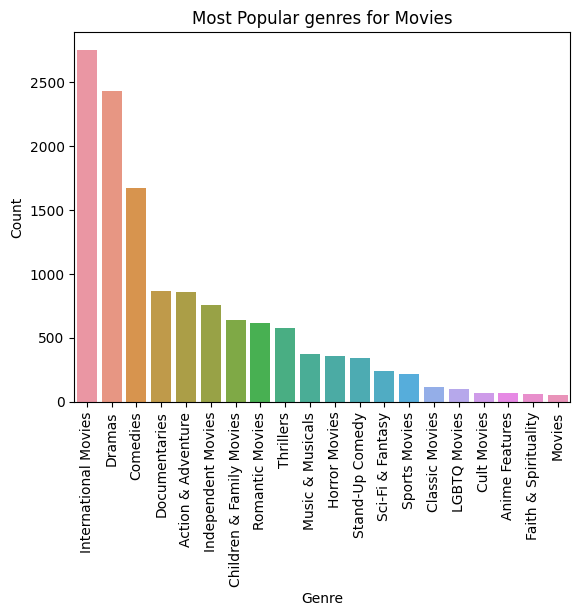

In [ ]:
sns.barplot(data=genres,x='listed_in',y='title')
plt.title('Most Popular genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#most popular genres for TV shows

df = data[data["type"]=="TV Show"]
genres = df.groupby("listed_in")["title"].nunique().reset_index()
genres = genres.sort_values(by=['title'],ascending=False)

genres

,listed_in,title
5,International TV Shows,1351
15,TV Dramas,763
14,TV Comedies,581
3,Crime TV Shows,470
6,Kids' TV,451
4,Docuseries,395
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,253
0,Anime Series,176


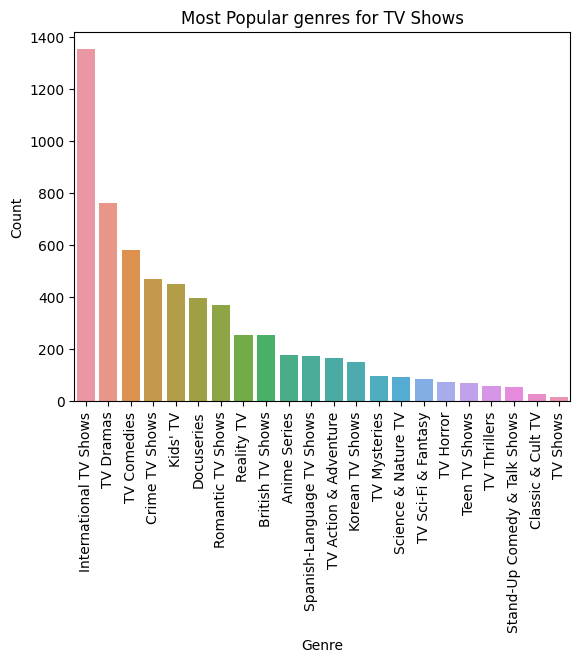

In [ ]:
sns.barplot(data=genres,x='listed_in',y='title')
plt.title('Most Popular genres for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

**Insight:**
* Genres like "International TV Shows/movies" "Dramas," and "Comedies" in both movies and TV shows are likely to resonate well with the audience.
* The presence of various genres like "Kids' TV," "Romantic TV Shows," and "Reality TV" suggests that the platform caters to a diverse audience, including children, romance enthusiasts, and reality show fans.
* International TV shows and International movies being the most popular shows that the content has a global appeal.
* Niche genres like "Anime Series," "Science & Nature TV," and "Teen TV Shows" can attract dedicated niche audiences, potentially leading to higher user loyalty


In [ ]:
#After how many days will the movie be added to the platform from it's release date
# We take only the tiles from 2008 inwards as that was when the first content was added.

data["date_added"].min()


Timestamp('2008-01-01 00:00:00')

In [ ]:
df = data[data["type"]=="TV Show"]
new_releases = df[df['release_year'] >= 2008]

def func(x):
  new_releases["time_taken"] = new_releases["date_added"].dt.year -new_releases["release_year"]
  return x

new_releases.groupby("title").apply(func)
new_df = new_releases.drop_duplicates(subset=['title', 'time_taken'])
new_df[['title','time_taken']].reset_index(drop=True)

within = new_df.groupby('time_taken')["title"].count()
within = within.sort_values(ascending=False)
within

#within 365 days for the vast majority of TV shows

<ipython-input-63-28c2557911ad>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  new_releases.groupby("title").apply(func)


time_taken
 0     1379
 1      406
 2      224
 3      144
 4       95
 5       72
 6       69
 7       49
 8       39
 9       30
 10      12
 11      11
-1       10
 12       7
 13       2
-2        1
-3        1
Name: title, dtype: int64

In [ ]:
df = data[data["type"]=="Movie"]
new_releases = df[df['release_year'] >= 2008]
new_releases

def func(x):
  new_releases["time_taken"] = new_releases["date_added"].dt.year -new_releases["release_year"]
  return x

new_releases.groupby("title").apply(func)
new_df = new_releases.drop_duplicates(subset=['title', 'time_taken'])

within = new_df.groupby('time_taken')["title"].count()
within = within.sort_values(ascending=False)
within

#within 2 years for movies

<ipython-input-64-7ce91479c396>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  new_releases.groupby("title").apply(func)


time_taken
 0     1862
 1     1178
 2      489
 3      347
 4      273
 5      191
 6      181
 8      147
 7      139
 9      127
 10     114
 11      93
 12      43
 13      23
-1        2
Name: title, dtype: int64

**Insight:**
* The fact that a significant number of TV shows (1379) are added to the platform in the same year as their release suggests a strategy of quickly adding fresh content to attract viewers.
* The drop in the number of TV shows added as time taken increases (e.g., from 2 onwards) could indicate that older content is being added selectively, possibly based on user demand or thematic events
* Adding movies within a year of their release can cater to viewers who missed them in theaters and prefer to stream them shortly after their release.
* The presence of movies added over a span of multiple years (e.g., from 0 to 13 time taken) suggests a long-term content acquisition and addition strategy to maintain a diverse movie collection


In [ ]:
# has number of movies released per year changed over the last 20 year

df = data[data["type"]=="Movie"]
new_releases = df[df['release_year'] >= 2000]
years= new_releases.groupby("release_year")['title'].nunique()
years_df_movies = pd.DataFrame(years).reset_index()
years_df_movies

,release_year,title
0,2000,33
1,2001,40
2,2002,44
3,2003,51
4,2004,55
5,2005,67
6,2006,82
7,2007,74
8,2008,113
9,2009,118


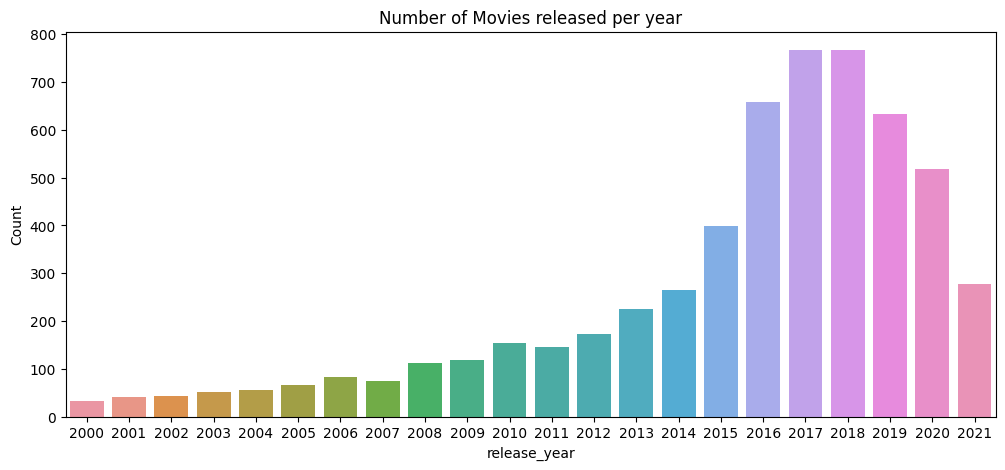

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=years_df_movies,x="release_year",y="title")
plt.title('Number of Movies released per year')
plt.ylabel('Count')
plt.show()

In [ ]:
# has number of TV shows released per year changed over the last 20 year

df = data[data["type"]=="TV Show"]
new_releases = df[df['release_year'] >= 2000]
years= new_releases.groupby("release_year")['title'].nunique()
years_df_tv = pd.DataFrame(years).reset_index()
years_df_tv

,release_year,title
0,2000,4
1,2001,5
2,2002,7
3,2003,10
4,2004,9
5,2005,13
6,2006,14
7,2007,14
8,2008,23
9,2009,34


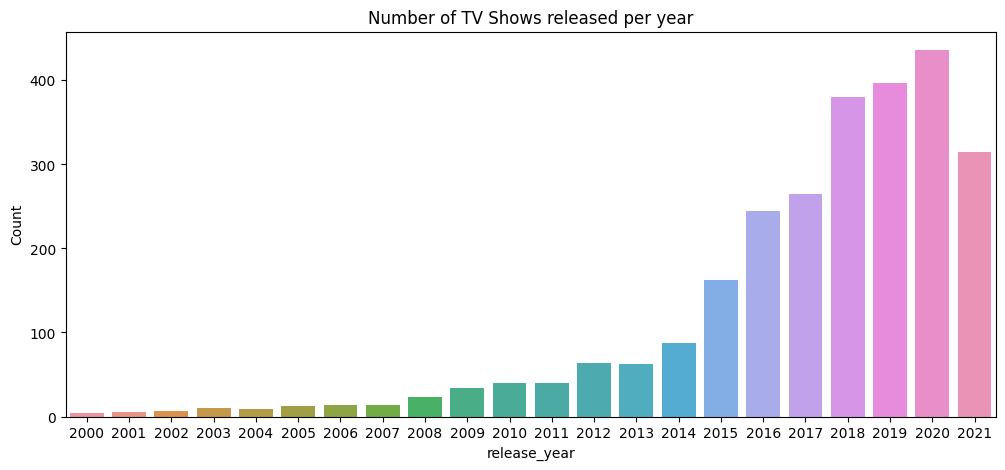

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=years_df_tv,x="release_year",y="title")
plt.title('Number of TV Shows released per year')
plt.ylabel('Count')
plt.show()

**Insights:**
* There has been a rapid adoption of online platforms in the past 20 years.
From the above 2 graphs, There was a rising trend in movie releases from 2015 to 2018.
* Comparing the 2 graphs we can see that in 2018, the trend reversed. And the number of TV shows being released started increasing and the number of movies started increasing.
* This indicates a much larger preference for TV shows over movies. One possibility for this is during the covid-19 pandemic , customers were looking for longer format content like tv shows since they have a much longer run-time than the average runtime for a movie which is 99 minutes.


# Recommendations:

1. **Content Strategy:**
* Focus on Movie Production: Given the platform's audience preference for movies and the global trend of larger movie production, consider investing more in movie production to cater to viewer preferences.

2. **Tailored TV Show Releases:**
* Recognize the rising preference for TV shows, especially during the COVID-19 pandemic. Strategically release TV shows to align with viewer demand for longer content during extended periods of home entertainment.

3. **Diverse Library:**
* Maintain Content Diversity: Capitalize on the diverse range of content, including classics and contemporary releases. This provides viewers with a broader selection that appeals to various tastes and age groups.

4. **Release Timing:**
* Optimize Release Calendar: Leverage the observed seasonal patterns in content releases to plan strategically timed content launches. Release content during peak engagement weeks to maximize viewership and user activity.

5. **Global Expansion:**
* Continue offering content from various countries. Exploit opportunities to tap into emerging markets like India, South Korea, and Mexico, where there's a growing local entertainment industry.

6. **Director and Actor Collaboration:**
* Collaborate with the top directors and actors identified in the analysis. Their involvement can enhance content quality, viewer engagement, and platform reputation.

7. **Genre-Centric Strategy:**
* Utilize the insights about popular genres to guide content acquisition and production strategies. Prioritize genres like "Dramas," "Comedies," and "Action & Adventure" that resonate well with viewers.

